In [34]:
import matplotlib.pylab as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from glob import glob
import torch

In [58]:
car_list=list()
for i in range(5):
    path = 'exp_CAR/_result/CAR_R50/sct_B128_R1_D64_lr{}_lam1.0/{}/events*'.format(0.02,i)    
    for f in glob(path):
        event_acc = EventAccumulator(f)
        event_acc.Reload()
        _,_,car = zip(*event_acc.Scalars('hn_ratio'))
        car_list.append(car)
car = torch.Tensor(car_list).mean(0)

In [62]:
cub_list=list()
for i in range(5):
    path = 'exp_CUB/_result/CUB_R50/sct_B128_R1_D64_lr{}_lam1.0/{}/events*'.format(0.009,i)
    for f in glob(path):
        event_acc = EventAccumulator(f)
        event_acc.Reload()
        _,_,cub = zip(*event_acc.Scalars('hn_ratio'))
        cub_list.append(cub)
cub = torch.Tensor(cub_list).mean(0)

In [63]:
sop_list=list()
for i in range(5):
    path = 'exp_SOP/_result/SOP_R50/sct_B512_R5_D512_lr{}_lam1.0/{}/events*'.format(0.03,i)
    for f in glob(path):
        event_acc = EventAccumulator(f)
        event_acc.Reload()
        _,_,sop = zip(*event_acc.Scalars('hn_ratio'))
        sop_list.append(sop)
sop = torch.Tensor(sop_list).mean(0)

In [65]:
icr_list=list()
for i in range(5):
    path = 'exp_Inshop/_result/ICR_R50/sct_B512_R5_D512_lr{}_lam1.0/{}/events*'.format(0.1,i)
    for f in glob(path):
        event_acc = EventAccumulator(f)
        event_acc.Reload()
        _,_,icr = zip(*event_acc.Scalars('hn_ratio'))
        icr_list.append(icr)
icr = torch.Tensor(icr_list).mean(0)

In [66]:
hotel_list=list()
for i in range(3):
    path = 'exp_Hotel/_result/HOTEL_R50/sct_B512_R5_D256_lr{}_lam1.0/{}/events*'.format(0.1,i)
    for f in glob(path):
        event_acc = EventAccumulator(f)
        event_acc.Reload()
        _,_,hotel = zip(*event_acc.Scalars('hn_ration'))
        hotel_list.append(hotel)
hotel = torch.Tensor(hotel_list).mean(0)

In [67]:
car_sp = car[torch.linspace(0,len(car)-1,len(cub)).long()]
cub_sp = cub[torch.linspace(0,len(cub)-1,len(cub)).long()]
sop_sp = sop[torch.linspace(0,len(sop)-1,len(cub)).long()]
icr_sp = icr[torch.linspace(0,len(icr)-1,len(cub)).long()]
hotel_sp = hotel[torch.linspace(0,len(hotel)-1,len(cub)).long()]

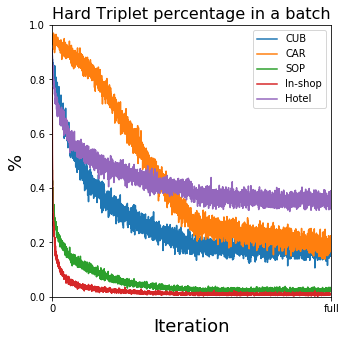

In [71]:
plt.figure(figsize=(5,5))
plt.plot(cub_sp,label = 'CUB')
plt.plot(car_sp,label = 'CAR')
plt.plot(sop_sp,label = 'SOP')
plt.plot(icr_sp,label = 'In-shop')
plt.plot(hotel_sp,label = 'Hotel')
plt.legend()
plt.xlim(0,len(cub))
plt.ylim(0,1)
plt.xticks([0,len(cub)],[0,'full'])
# plt.xticks([0,500,1000,1500,2000],['0','10k','20k','30k','40k'])
plt.xlabel('Iteration',fontsize=18)
plt.ylabel('%',fontsize=18)
plt.title('Hard Triplet percentage in a batch',fontsize=16)
plt.savefig('ratio',dpi=200,bbox='tight')